In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import os
import sys
import glob
import random

from pprint import pprint
from ipywidgets import Video

from PIL import Image
from PIL.ExifTags import TAGS

In [2]:
# dysk Ani
!gdown --id 1OjFFysQD-MbhiTzfesrvXqkIg6oNRIyK
# dysk Agi
!gdown --id 1APJsddWLOTyYxlgK-nHNK9o6AU_B-NgY

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OjFFysQD-MbhiTzfesrvXqkIg6oNRIyK
To: /content/roonie_snooker.mp4
100% 6.24M/6.24M [00:00<00:00, 184MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1APJsddWLOTyYxlgK-nHNK9o6AU_B-NgY
To: /content/test.mp4
100% 3.30M/3.30M [00:00<00:00, 162MB/s]


In [3]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [4]:
def open_video(path):
  video = cv2.VideoCapture(path)
  if not video.isOpened():
      print("[ERROR]: Could not open video from the given path.")

  video_width = int(video.get(3))
  video_height = int(video.get(4))
  video_fps = video.get(cv2.CAP_PROP_FPS)
  print(f"Video: width={video_width} height={video_height} fps={video_fps}")

  return video, video_width, video_height, video_fps

Video: width=1280 height=720 fps=25.0


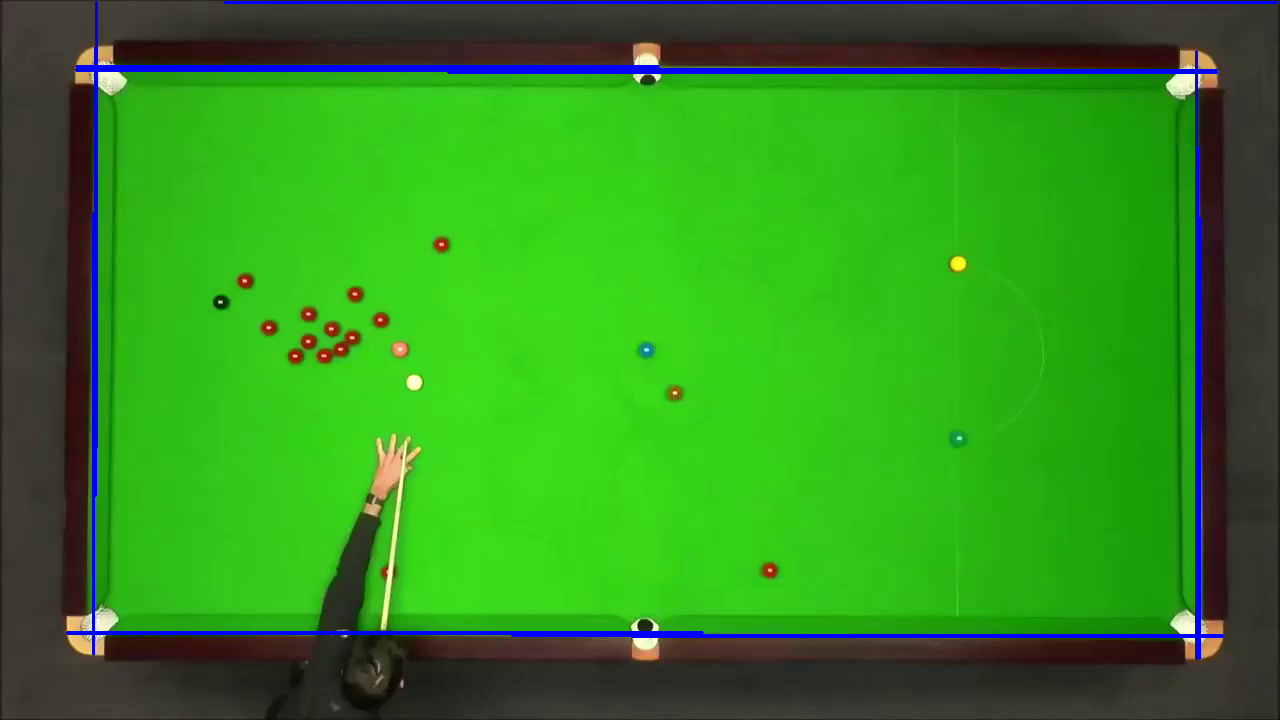

In [5]:
video, video_width, video_height, video_fps = open_video('./roonie_snooker.mp4')
# video_track = cv2.VideoWriter('./roonie_snooker.avi', cv2.VideoWriter_fourcc(*'DIVX'), video_fps, (video_width, video_height))

video.set(cv2.CAP_PROP_POS_FRAMES, 0)
for _ in range(1):
    ret, frame = video.read()
    _frame = frame.copy()

    if ret:
        # detect table
        gray_f = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        threshold_f = cv2.adaptiveThreshold(gray_f, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, -12)
        lines = cv2.HoughLinesP(threshold_f, rho=2, theta=np.pi/20, threshold=600, minLineLength=400, maxLineGap=50)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        
        imshow(_frame)

        # detect pockets
        ...

        # video_track.write(gray_frame)
    else:
        break

# video_track.release()
# !ffmpeg -hide_banner -loglevel error -i roonie_snooker.avi -y roonie_snooker.mp4
# Video.from_file('./roonie_snooker.mp4', width=video_width, height=video_height)